# Evaluation: Precision & Recall

Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics.

We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 

In [1]:
# Libraries
from sklearn.datasets import fetch_openml
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score

In [2]:
# Load data
mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']

#### Now take a look at the shapes of the X and y matrices.

In [3]:
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

#### Let's pick one entry and see what number is written. Use indexing to pick the 35th digit.

In [5]:
X[35]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

####  Use the *reshape(28,28)* method and *plt.imshow()* function with the parameters *cmap = matplotlib.cm.binary* and *interpolation="nearest"* to make a plot of the number. Be sure to import matplotlib.

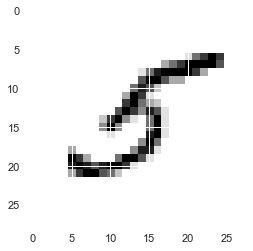

In [6]:
plt.imshow(X[35].reshape((28,28)), cmap = plt.cm.binary,interpolation='nearest')
plt.show()

#### Use indexing to see if what the plot shows matches with the outcome of the 35th index.

In [7]:
y[35]
#it does

'5'

#### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training and the rest for testing.

In [8]:
X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

In [9]:
y_train.shape

(60000,)

In [10]:
X_test.shape

(10000, 784)

#### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5.

In [11]:
y_train_5 = np.where(y_train== '5',1, 0)
y_test_5 = np.where(y_test == '5', 1, 0)

#### Lets train a logistic regression to predict if a number is a 5 or not. Remember to use the 'just 5s' target train array.

In [12]:
model_5 = LogisticRegression().fit(X_train, y_train_5)

C:\Users\Andreu\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#### Does the classifier predict correctly the 35th digit we picked before?

In [25]:
y_pred = model_5.predict(X_train)
print(y_pred[35])
print(y[35])

1
5


In [26]:
#it predicts 1,meaning it predicts that the number is indeed a 5. So it works.

#### The 36000th value is a 9. Check if it was correctly predicted.

In [27]:
print(y_pred[36000])
print(y[36000])

0
9


In [28]:
#Yes it predictedcorrectlythat the number isn't a 5,ergo, it shows a 0.

In [29]:
y_pred_t = model_5.predict(X_test)

#### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below.

In [30]:
# Libraries
from sklearn.base import BaseEstimator

In [31]:
# Dumb classifier
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1))[:, 0]

never_5_clf = Never5Classifier()

#### Now lets fit and predict on the testing set using our dumb classifier.

In [32]:
never_5_clf.fit(X_train)
y_pred_n5 = never_5_clf.predict(X_test)

#### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [35]:
print('Logistic Regression')
print('CF: ', confusion_matrix(y_test_5, y_pred_t))
print('Precision: ', precision_score(y_test_5, y_pred_t))
print('Recall: ', recall_score(y_test_5, y_pred_t))
print('F1 score: ',f1_score(y_test_5, y_pred_t))
print('_______________')
print('Dumb Classifier')
print('CF: ', confusion_matrix(y_test_5, y_pred_n5))
print('Precision: ', precision_score(y_test_5, y_pred_n5))
print('Recall: ', recall_score(y_test_5, y_pred_n5))
print('F1 score: ',f1_score(y_test_5, y_pred_n5))

Logistic Regression
CF:  [[9034   74]
 [ 147  745]]
Precision:  0.9096459096459096
Recall:  0.8352017937219731
F1 score:  0.8708357685563999
_______________
Dumb Classifier
CF:  [[9108    0]
 [ 892    0]]
Precision:  0.0
Recall:  0.0
F1 score:  0.0


C:\Users\Andreu\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

What we see is that the Logistic regression is a reliable model with high precision andin the confusion matrix we see it has done 9779 right outcomes and only 221 wrong ones.
In the other hand, the dumb classifier has chosen to say none of the outcomes are 5, so it only outcomes 0's. Due to the unbalance in the data, it actually predicts correctly 9108 outcomes and misses 892, but it's presicion is 0.


#### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each.

In [38]:
#Logistic Regression
fpr_5, tpr_5, thresholds_5 = metrics.roc_curve(y_test_5, y_pred_t)
#Dumb Classifier
fpr_n5, tpr_n5, thresholds_n5 = metrics.roc_curve(y_test_5, y_pred_n5)

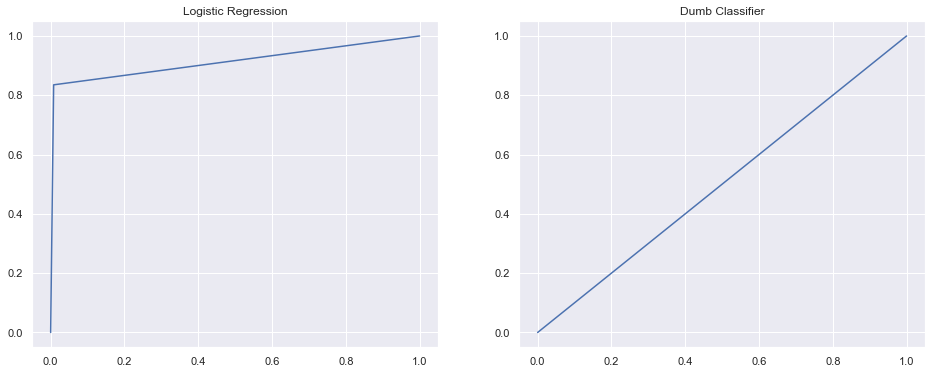

In [46]:
f, (ax1,ax2) = plt.subplots(1,2,figsize=(16,6))

ax1.plot(fpr_5,tpr_5)
ax1.title.set_text('Logistic Regression')

ax2.plot(fpr_n5,tpr_n5)
ax2.title.set_text('Dumb Classifier')

plt.show()

#### Now find the roc_auc_score for each. 

In [47]:
roc_auc_score(y_test_5, y_pred_t)

0.9135385341029717

In [48]:
roc_auc_score(y_test_5, y_pred_n5)

0.5

#### What does this metric tell you? Which classifier works better with this metric in mind?

Clearly the Logistic Regression, it has a 91% chance topredict correctly, whereas the dumb on only a 50%.